# CALIDAD DE DATOS

## IMPORTAR PAQUETES

In [57]:
import numpy as np
import pandas as pd
from janitor import clean_names

#Automcompletar rápido
%config IPCompleter.greedy=True

import warnings
warnings.filterwarnings('ignore')

## IMPORTAR LOS DATOS

Sustituir la ruta del proyecto.

In [28]:
ruta_proyecto = 'C:/Users/pelop/OneDrive/Desktop/Curso Data Science Pedro/2 CURSO DATA SCIENCE/03_MACHINE_LEARNING/07_CASOS/02_RETAIL/'

Sustituir el nombre_fichero_datos.

In [29]:
nombre_fichero_datos = 'trabajo.csv'

Cargar los datos.

In [31]:
ruta_completa = ruta_proyecto + '/02_Datos/03_Trabajo/' + nombre_fichero_datos

df = pd.read_csv(ruta_completa,parse_dates=['date'],index_col='date')
df

,state_id,store_id,dept_id,cat_id,item_id,wm_yr_wk,d,ventas,sell_price,year,month,wday,weekday,event_name_1,event_type_1,event_name_2,event_type_2
date,,,,,,,,,,,,,,,,,
2013-01-01,CA,CA_3,FOODS_3,FOODS,FOODS_3_090,11249,d_704,0,1.25,2013,1,4,Tuesday,NewYear,National,NaN,NaN
2013-01-01,CA,CA_3,FOODS_3,FOODS,FOODS_3_120,11249,d_704,0,4.98,2013,1,4,Tuesday,NewYear,National,NaN,NaN
2013-01-01,CA,CA_3,FOODS_3,FOODS,FOODS_3_202,11249,d_704,20,4.28,2013,1,4,Tuesday,NewYear,National,NaN,NaN
2013-01-01,CA,CA_3,FOODS_3,FOODS,FOODS_3_252,11249,d_704,34,1.48,2013,1,4,Tuesday,NewYear,National,NaN,NaN
2013-01-01,CA,CA_3,FOODS_3,FOODS,FOODS_3_288,11249,d_704,0,NaN,2013,1,4,Tuesday,NewYear,National,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-11-30,CA,CA_4,FOODS_3,FOODS,FOODS_3_329,11544,d_1767,5,2.98,2015,11,3,Monday,NaN,NaN,NaN,NaN
2015-11-30,CA,CA_4,FOODS_3,FOODS,FOODS_3_555,11544,d_1767,4,1.68,2015,11,3,Monday,NaN,NaN,NaN,NaN
2015-11-30,CA,CA_4,FOODS_3,FOODS,FOODS_3_586,11544,d_1767,9,1.68,2015,11,3,Monday,NaN,NaN,NaN,NaN


## VISIÓN GENERAL

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 21280 entries, 2013-01-01 to 2015-11-30
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   state_id      21280 non-null  object 
 1   store_id      21280 non-null  object 
 2   dept_id       21280 non-null  object 
 3   cat_id        21280 non-null  object 
 4   item_id       21280 non-null  object 
 5   wm_yr_wk      21280 non-null  int64  
 6   d             21280 non-null  object 
 7   ventas        21280 non-null  int64  
 8   sell_price    21209 non-null  float64
 9   year          21280 non-null  int64  
 10  month         21280 non-null  int64  
 11  wday          21280 non-null  int64  
 12  weekday       21280 non-null  object 
 13  event_name_1  1700 non-null   object 
 14  event_type_1  1700 non-null   object 
 15  event_name_2  60 non-null     object 
 16  event_type_2  60 non-null     object 
dtypes: float64(1), int64(5), object(11)
memory usage: 2.

## TIPOS DE DATOS

### Identificación

In [33]:
df.dtypes

state_id         object
store_id         object
dept_id          object
cat_id           object
item_id          object
wm_yr_wk          int64
d                object
ventas            int64
sell_price      float64
year              int64
month             int64
wday              int64
weekday          object
event_name_1     object
event_type_1     object
event_name_2     object
event_type_2     object
dtype: object

Conclusión: 

* year, month, y wday deberían ser categóricas

### Corrección

In [34]:
df = df.astype({'year':'O',
               'month': 'O',
               'wday': 'O'})

df.dtypes

state_id         object
store_id         object
dept_id          object
cat_id           object
item_id          object
wm_yr_wk          int64
d                object
ventas            int64
sell_price      float64
year             object
month            object
wday             object
weekday          object
event_name_1     object
event_type_1     object
event_name_2     object
event_type_2     object
dtype: object

## VALORES ÚNICOS

### Identificación

In [35]:
df.nunique().sort_values()

state_id           1
cat_id             1
dept_id            1
event_type_2       2
store_id           2
event_name_2       3
year               3
event_type_1       4
wday               7
weekday            7
item_id           10
month             12
sell_price        23
event_name_1      30
wm_yr_wk         153
ventas           301
d               1064
dtype: int64

### Corrección

In [36]:
df.drop(columns = ['state_id','cat_id','dept_id'], inplace = True)

## DUPLICADOS

### Identificación

In [37]:
df.duplicated().sum()

0

## SEPARAR NUMÉRICAS Y CATEGÓRICAS

### Categóricas

In [38]:
cat = df.select_dtypes(exclude = 'number').copy()

### Numéricas

In [39]:
num = df.select_dtypes(include='number').copy()

## GESTIÓN DE CATEGÓRICAS

### Nulos

#### Identificación

In [40]:
cat.isna().sum().sort_values(ascending = False)

event_name_2    21220
event_type_2    21220
event_name_1    19580
event_type_1    19580
store_id            0
item_id             0
d                   0
year                0
month               0
wday                0
weekday             0
dtype: int64

In [41]:
cat.event_name_1.value_counts(dropna=False)

event_name_1
NaN                    19580
NewYear                   60
Mother's day              60
Thanksgiving              60
VeteransDay               60
Halloween                 60
EidAlAdha                 60
ColumbusDay               60
LaborDay                  60
Eid al-Fitr               60
Ramadan starts            60
IndependenceDay           60
NBAFinalsEnd              60
NBAFinalsStart            60
MemorialDay               60
Pesach End                60
Easter                    60
StPatricksDay             60
Purim End                 60
LentWeek2                 60
PresidentsDay             60
ValentinesDay             60
LentStart                 60
SuperBowl                 60
MartinLutherKingDay       60
OrthodoxChristmas         60
OrthodoxEaster            40
Father's day              40
Chanukah End              40
Christmas                 40
Cinco De Mayo             40
Name: count, dtype: int64

In [42]:
cat.event_name_2.value_counts(dropna=False)

event_name_2
NaN               21220
Cinco De Mayo        20
OrthodoxEaster       20
Father's day         20
Name: count, dtype: int64

In [43]:
cat.event_type_1.value_counts(dropna=False)

event_type_1
NaN          19580
National       580
Religious      560
Cultural       380
Sporting       180
Name: count, dtype: int64

In [44]:
cat.event_type_2.value_counts(dropna=False)

event_type_2
NaN          21220
Cultural        40
Religious       20
Name: count, dtype: int64

In [45]:
pd.crosstab(index=cat['event_name_1'], columns=cat['event_name_2'])

event_name_2,Cinco De Mayo,Father's day,OrthodoxEaster
event_name_1,,,
Easter,0,0,20
NBAFinalsEnd,0,20,0
OrthodoxEaster,20,0,0


Conclusiones:

* event_name_2 tiene eventos que ya están incluídos en event_name_1
* pero luego al cruzarlos no coinciden
* como no sabemos por qué vamos a eliminar event_name_2 y también event_type_2
* en cuanto a los nulos de event_name_1 y event_type_1 parece claro que son días "Sin_evento", así lo imputaremos

#### Corrección

##### Eliminar la variable

In [46]:
cat.drop(columns = ['event_name_2','event_type_2'],inplace = True)

##### Imputar por un valor

###### Variables a imputar

In [47]:
var_imputar_valor = ['event_name_1','event_type_1']

###### Valor por el que imputar

In [48]:
valor = 'Sin_evento'

###### Imputar

In [49]:
cat[var_imputar_valor] = cat[var_imputar_valor].fillna(valor)

Comprobamos.

In [50]:
cat.isna().sum().sort_values(ascending = False)

store_id        0
item_id         0
d               0
year            0
month           0
wday            0
weekday         0
event_name_1    0
event_type_1    0
dtype: int64

### Atípicos

#### Categorías poco frecuentes

##### Identificación

In [51]:
for variable in cat:
    print(variable + '\n')
    print(cat[variable].value_counts(dropna = False))
    print('\n\n')

store_id

store_id
CA_3    10640
CA_4    10640
Name: count, dtype: int64



item_id

item_id
FOODS_3_090    2128
FOODS_3_120    2128
FOODS_3_202    2128
FOODS_3_252    2128
FOODS_3_288    2128
FOODS_3_329    2128
FOODS_3_555    2128
FOODS_3_586    2128
FOODS_3_587    2128
FOODS_3_714    2128
Name: count, dtype: int64



d

d
d_704     20
d_1418    20
d_1404    20
d_1405    20
d_1406    20
          ..
d_1064    20
d_1065    20
d_1066    20
d_1067    20
d_1767    20
Name: count, Length: 1064, dtype: int64



year

year
2013    7300
2014    7300
2015    6680
Name: count, dtype: int64



month

month
1     1860
3     1860
5     1860
7     1860
8     1860
10    1860
4     1800
6     1800
9     1800
11    1800
2     1680
12    1240
Name: count, dtype: int64



wday

wday
4    3040
5    3040
6    3040
7    3040
1    3040
2    3040
3    3040
Name: count, dtype: int64



weekday

weekday
Tuesday      3040
Wednesday    3040
Thursday     3040
Friday       3040
Saturday     3040
Sunday       3040

Conclusión:

* No hay variables con categorías raras
* Hay meses con menos registros, esto puede ser porque son los meses con menos de 31 días
* 2015 tiene menos registros ¿serán los de validación o hay más?

Vamos a comprobarlo.

In [52]:
df.groupby('year').d.nunique()

year
2013    365
2014    365
2015    334
Name: d, dtype: int64

Parece que faltan 31 días.

Vamos a ver cuales.

In [53]:
pd.date_range(start = '2015-01-01', end = '2015-12-31' ).difference(df.loc['2015'].index)

DatetimeIndex(['2015-12-01', '2015-12-02', '2015-12-03', '2015-12-04',
               '2015-12-05', '2015-12-06', '2015-12-07', '2015-12-08',
               '2015-12-09', '2015-12-10', '2015-12-11', '2015-12-12',
               '2015-12-13', '2015-12-14', '2015-12-15', '2015-12-16',
               '2015-12-17', '2015-12-18', '2015-12-19', '2015-12-20',
               '2015-12-21', '2015-12-22', '2015-12-23', '2015-12-24',
               '2015-12-25', '2015-12-26', '2015-12-27', '2015-12-28',
               '2015-12-29', '2015-12-30', '2015-12-31'],
              dtype='datetime64[ns]', freq='D')

Está claro que son los de validación, así que todo correcto.

## GESTIÓN DE NUMÉRICAS

### Estadísticos

In [54]:
num.describe().T

,count,mean,std,min,25%,50%,75%,max
wm_yr_wk,21280.0,11415.022556,82.874752,11249.0,11335.0,11420.00,11506.00,11544.00
ventas,21280.0,28.874577,38.988147,0.0,6.0,18.00,37.00,763.00
sell_price,21209.0,2.397254,1.237024,1.0,1.5,1.58,2.98,4.98


### Nulos

#### Identificación

In [63]:
num.isna().sum().sort_values(ascending = False)

sell_price    71
wm_yr_wk       0
ventas         0
dtype: int64

sell_price es una variable relevante, vamos a ver si encontramos algún patrón.

In [64]:
#Por producto
df.groupby('item_id').apply(lambda x: x.sell_price.isna().sum()).sort_values(ascending=False)

item_id
FOODS_3_288    71
FOODS_3_090     0
FOODS_3_120     0
FOODS_3_202     0
FOODS_3_252     0
FOODS_3_329     0
FOODS_3_555     0
FOODS_3_586     0
FOODS_3_587     0
FOODS_3_714     0
dtype: int64

In [65]:
#Por nivel de ventas
df.groupby('ventas').apply(lambda x: x.sell_price.isna().sum()).sort_values(ascending=False)

ventas
0      71
210     0
207     0
206     0
205     0
       ..
100     0
99      0
98      0
97      0
763     0
Length: 301, dtype: int64

Solo pasa en un producto y solo los días en los que no hay ventas.

Claramente el motivo es que si no hay ventas no le pone el precio.

Tenemos que corregir esto, ya que es artificial:

* El producto tiene un precio aunque ese día no haya habido ventas

Lo que tendría más sentido es imputar esos nulos por el primer valor válido anterior SEGMENTADO POR PRODUCTO.

Pero podría pasar que el primer día de un producto tuviera ventas cero, lo cual arrastraría los nulos hacia delante sin solucionar el problema.

Así que vamos a imputar por el valor más frecuente del precio de CADA PRODUCTO (la moda).

Esto añade complejidad, ya que necesitamos el producto que no lo tenemos en num.

Así que tenemos que incluirlo temporalmente y después eliminarlo.

##### Añadir el producto

In [66]:
num = pd.concat([num,cat.item_id], axis = 1)
num

,wm_yr_wk,ventas,sell_price,item_id
date,,,,
2013-01-01,11249,0,1.25,FOODS_3_090
2013-01-01,11249,0,4.98,FOODS_3_120
2013-01-01,11249,20,4.28,FOODS_3_202
2013-01-01,11249,34,1.48,FOODS_3_252
2013-01-01,11249,0,NaN,FOODS_3_288
...,...,...,...,...
2015-11-30,11544,5,2.98,FOODS_3_329
2015-11-30,11544,4,1.68,FOODS_3_555
2015-11-30,11544,9,1.68,FOODS_3_586


#### Corrección de los nulos de sell_price

##### Calcular el precio más frecuente por producto e imputar

In [67]:
def imputar_moda(registros):
    #Calcula la moda del precio en ese producto
    moda = registros.sell_price.mode()[0]
    #Imputa los nulos
    registros.loc[registros.sell_price.isna(),'sell_price'] = moda
    #Devuelve todos los registros del producto
    return(registros)

num = num.groupby('item_id', group_keys=False).apply(imputar_moda)

Para comprobar que la imputación se ha hecho por producto podemos revisar los valores distintos de precio en cada producto y ver que no haya un salto grande, por ejemplo un salto de 3 a 10.

In [68]:
num.groupby('item_id').sell_price.value_counts()

item_id      sell_price
FOODS_3_090  1.48           658
             1.38           546
             1.44           504
             1.00           280
             1.50            90
             1.25            50
FOODS_3_120  4.98          2128
FOODS_3_202  4.58           727
             4.38           525
             4.28           386
             3.98           350
             3.00           105
             3.33            21
             3.25             7
             4.48             7
FOODS_3_252  1.58          1182
             1.48           946
FOODS_3_288  1.50          2100
             1.25            21
             1.18             7
FOODS_3_329  2.98          2079
             2.74            42
             1.98             7
FOODS_3_555  1.58          1149
             1.68           979
FOODS_3_586  1.58          1149
             1.68           979
FOODS_3_587  2.48          1644
             2.68           421
             1.98            63
FOODS_3_714  1.5

##### Eliminar el producto de num

In [69]:
num.drop(columns = 'item_id',inplace=True)

In [70]:
num.head()

,wm_yr_wk,ventas,sell_price
date,,,
2013-01-01,11249,0,1.25
2013-01-01,11249,33,1.25
2013-01-01,11249,0,4.98
2013-01-01,11249,0,4.98
2013-01-01,11249,20,4.28


### Atípicos

#### Por desviación típica

##### Identificación

###### Definir el número de desviaciones típicas

In [71]:
num_desv_tip = 4

###### Función que devuelve los índices de los atípicos

In [72]:
def atipicos_desv_tip(variable, num_desv_tip = 4):
    #sacamos los nulos por ahora
    variable = variable.dropna()
    #calculamos los límites
    media = np.mean(variable)
    sd = np.std(variable)
    umbral = sd * num_desv_tip
    lim_inf = media - umbral
    lim_sup = media + umbral
    #encontramos los índices de los que están fuera de los límites
    indices = [indice for indice,valor in variable.items() if valor < lim_inf or valor > lim_sup]
    return(indices)

###### Función que cuenta el número de atípicos

In [73]:
def conteo_atipicos(df,variable, num_desv_tip = 4):
    atipicos = atipicos_desv_tip(df[variable], num_desv_tip)
    return(df.loc[atipicos,variable].value_counts())

###### Variables a aplicar

In [74]:
var_atipicos_dt = ['ventas','sell_price']

###### Aplicar

In [75]:
for variable in var_atipicos_dt:
    print('\n' + variable + ':\n')
    print(conteo_atipicos(num,variable,num_desv_tip))


ventas:

ventas
0      518
1      103
5      100
10      95
7       92
      ... 
340      1
239      1
250      1
469      1
323      1
Name: count, Length: 247, dtype: int64

sell_price:

Series([], Name: count, dtype: int64)


Parece que puede ser atípicos superiores.

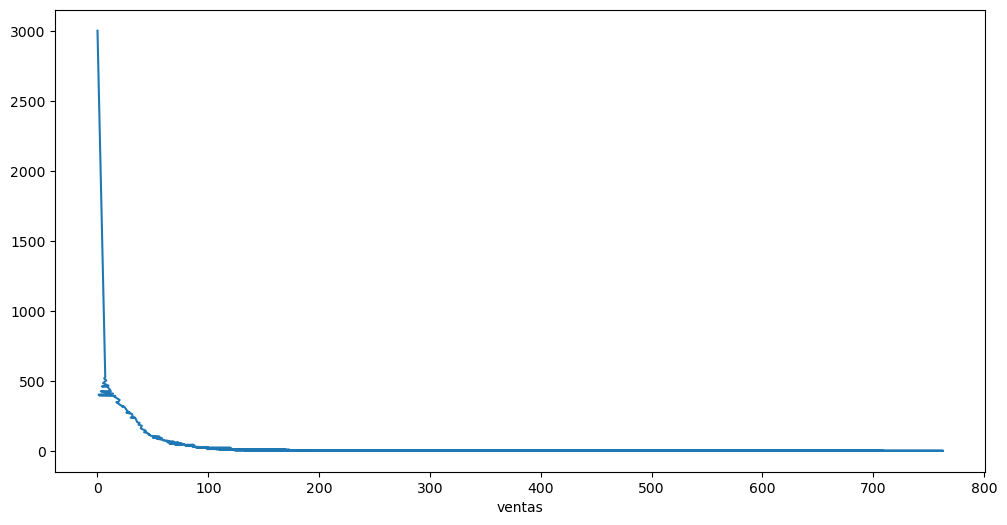

In [76]:
num.ventas.value_counts().plot(figsize = (12,6));

Conclusión:
    
* Es un claro ejemplo de cola larga, que es muy frecuente en retail
* Mejor no hacer nada por ahora en cuanto a atípicos, en EDA quizá lo veamos mejor

## GUARDAR DATASETS TRAS CALIDAD DE DATOS

Guarda los avances en df, cat y num con un sufijo para poder guardar o recuperar avances del proyecto.

En formato pickle para no perder las modificaciones de metadatos.

### Definir los nombres de los archivos

In [77]:
ruta_trabajo = ruta_proyecto + '/02_Datos/03_Trabajo/' + 'trabajo_resultado_calidad.pickle'
ruta_cat = ruta_proyecto + '/02_Datos/03_Trabajo/' + 'cat_resultado_calidad.pickle'
ruta_num = ruta_proyecto + '/02_Datos/03_Trabajo/' + 'num_resultado_calidad.pickle'

### Guardar los archivos

In [78]:
df.to_pickle(ruta_trabajo)
cat.to_pickle(ruta_cat)
num.to_pickle(ruta_num)